# Problem Set 2

The entries show the blod pressures of 4 groups of adults. Groups A and B are done on the same individuals before and after treatments, groups C and D are done in two other distinct groups of adults.


In [34]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [21]:
# import csv data
data = pd.read_csv('ProblemSet2_data.csv')
data.columns


Index(['Group A', 'Group B', 'Group C', 'Group D'], dtype='object')

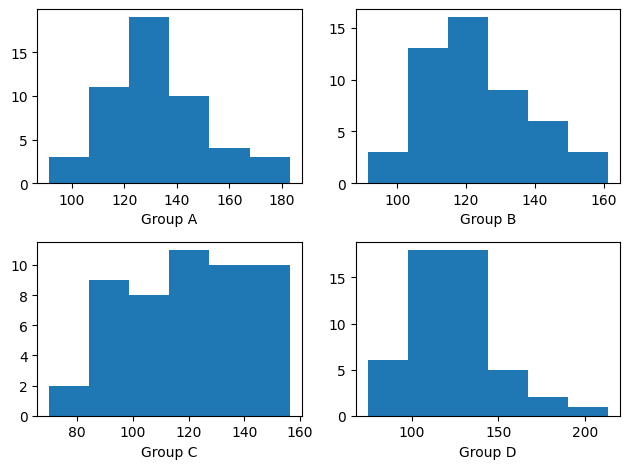

In [25]:
# Plot the histograms for all datasets 1 to 4, present the histograms in the form of a 2 by 2
# array using the subplot function in Matplotlib

num_groups = 4
bins = int(1 + math.log2(data.shape[0]))
for i in range(num_groups):
    data_name = data.columns[i]
    plt.subplot(2, 2, i + 1, xlabel=data_name)
    plt.hist(data[data_name], bins)

plt.tight_layout()



In [33]:
# Find the medians, standard deviations, and standard errors for each group

print("Medians: ")
print(data.median(), '\n')

print("Standard Deviations: ")
print(data.std(), '\n')

print("Standard Errors: ")
print(data.std()/math.sqrt(data.shape[0]), '\n')


Medians: 
Group A    129.879672
Group B    121.999935
Group C    119.756813
Group D    122.696732
dtype: float64 

Standard Deviations: 
Group A    17.589352
Group B    15.854468
Group C    22.389837
Group D    25.892003
dtype: float64 

Standard Errors: 
Group A    2.487510
Group B    2.242160
Group C    3.166401
Group D    3.661682
dtype: float64 



In [ ]:
# Apply the Shapiro-Wilk test to each dataset. What can you conclude by looking at the p-values?

for i in range(num_groups):
    data_name = data.columns[i]
    statistic, pvalue = stats.shapiro(x=data[data_name])
    print(data_name, ':  (W) = ', statistic, '; pvalue = ', pvalue)

Group A :  (W) =  0.9713521775079711 ; pvalue =  0.26247751034621963
Group B :  (W) =  0.9826851716984499 ; pvalue =  0.6693372914848483
Group C :  (W) =  0.9624165335366559 ; pvalue =  0.11223889545607468
Group D :  (W) =  0.9402162574354295 ; pvalue =  0.013740752662524952


The only group that had a p vaue indicating that the test group likely did not match a normal distribution was Group D. Notably, group D also had the smallest W value, indicating it was further than normality than the other three groups.